In [1]:
import os
import pickle as pkl
from config import *
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
files = [file for file in os.listdir("./embeddings/") if file.endswith(".pkl")]

In [3]:
embeddings = []
labels = []
domains = []
for file in files:
    data = pkl.load(open("./embeddings/" + file, "rb"))
    embeddings.extend(data['activations'][16])
    labels.extend(data['labels'])
    domains.extend([FILE_DOMAIN_MAPPING[file]] * len(data['labels']))

embeddings = np.array(embeddings)
labels = [index_class_mapping[x] for x in labels]

In [4]:
pca = PCA(n_components=0.95)
pca_embeddings = pca.fit_transform(embeddings)

In [5]:
tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(pca_embeddings)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


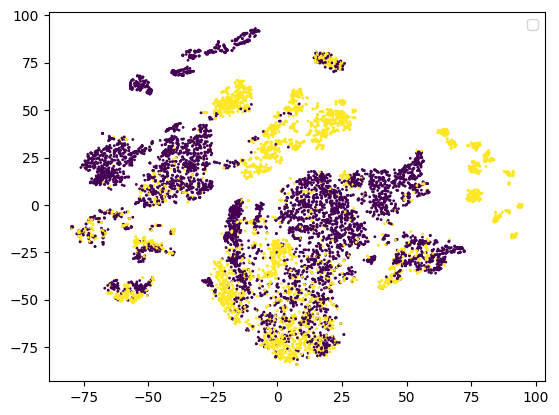

In [10]:
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=labels, s=1)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


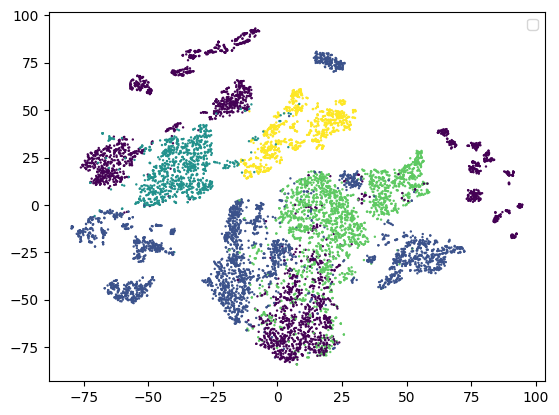

In [7]:
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=domains, s=0.5)
plt.legend()
plt.show()